Estimate the weight of liquid nitrogen based on its pressure using simple linear regression model. Consider BGD optimizer.
 Dataset : Pressure and Weight in Cryogenic Flow Meters. 
 Write the python code to build simple linear regression model using BGD optimizer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_excel("pressure_weight.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
z=np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


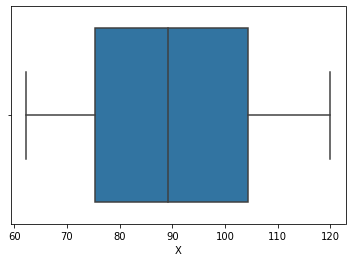

In [5]:
sns.boxplot(x=data['X'])

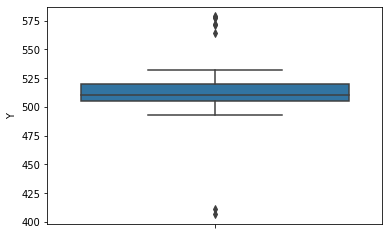

In [6]:
sns.boxplot(y=data['Y'])

In [7]:
f_data=data[(z<3).all(axis=1)]
f_data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [8]:
print(len(data))
print(len(f_data))
if(len(data)==len(f_data)):
  print('No outliers')

30
30
No outliers


**Normalisation**

In [9]:
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,X,Y
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


**Split Data**

In [10]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [11]:
print(len(train_data))
train_data.head()

27


,X,Y
21,0.474048,0.617219
23,0.676471,0.502036
16,0.069204,0.579407
13,0.532872,0.602094
20,0.456747,0.574171


**Train Data**

In [12]:
x=np.array(train_data['X'])
y=np.array(train_data['Y'])

In [14]:
m=1
c=-1
epochs=100 # epochs
l=0.1      # learning rate
err=[]
ns=len(x)
for i in range(epochs):
  er=0
  m_d=0
  c_d=0
  for j in range(len(x)):
    er+=((y[j]-(m*x[j])-c))**2
    m_d=m_d+((-1.0)*((y[j]-m*x[j]-c)*x[j]))
    c_d=c_d+((-1.0)*(y[j]-m*x[j]-c))
  m_d=m_d/ns
  c_d=c_d/ns
  d_m=-l*m_d
  d_c=-l*c_d
  m=m+d_m
  c=c+d_c
  er=(1/(2*len(train_data['X'])))*(er)
  err.append(er)
print("The minimun value occurs at m =%.2f"%(m),", c = %.2f"%(c))
print(err)

The minimun value occurs at m =0.64 , c = 0.30
[0.7677852350129755, 0.6223638513944902, 0.5098697588296859, 0.4227815499588625, 0.3552967110120672, 0.30293878694485077, 0.26225432493211026, 0.23057907830035768, 0.2058576421381299, 0.1865043093245039, 0.17129572647348415, 0.15928808225085817, 0.14975322144236083, 0.14212935948755157, 0.13598306069331353, 0.13097990592900177, 0.12686186391172039, 0.12342983404527445, 0.12053017890750636, 0.11804433459301555, 0.11588079549916432, 0.11396893090086889, 0.1122542146777732, 0.11069454523244472, 0.10925740644772482, 0.1079176774724608, 0.10665594305263974, 0.10545719001349212, 0.10430980164180281, 0.10320478188646946, 0.10213515685477817, 0.10109551308535117, 0.10008164133892813, 0.0990902617920308, 0.0981188120297814, 0.09716528348583683, 0.09622809525740944, 0.0953059967537429, 0.09439799258851454, 0.0935032846326004, 0.09262122730543834, 0.09175129307950046, 0.09089304586383014, 0.09004612046602108, 0.0892102067435273, 0.0883850373726613, 0

**MSE,RMSE,MAE for Training data:**

In [15]:
train_data_pred=m*train_data['X']+c

In [16]:
yp=[]
for i in range(len(x)):
  p=(m*x[i])+c
  yp.append(p)
print("Predicted values (yp) : ",yp)

Predicted values (yp) :  [0.6055774308529706, 0.7343906755323573, 0.3479509414941973, 0.6430103395632197, 0.5945677518205443, 0.5472261319811117, 0.4316245021406364, 0.4547448281087316, 0.8279729473079801, 0.5208029023032889, 0.5956687197237871, 0.3424461019779842, 0.4371293416568496, 0.8521942411793177, 0.7971458460171867, 0.4327254700438792, 0.7795303595653048, 0.476764186173584, 0.4316245021406364, 0.4459370848827905, 0.8830213424701111, 0.8940310215025373, 0.4580477318184594, 0.6980587347253507, 0.30391222536449247, 0.7035635742415638, 0.7134722853707476]


In [19]:
sum=0
s1=0
for i in range(len(x)):
  sum+=(y[i]-yp[i])**2
  s1+=y[i]-yp[i]
mse=sum/len(x)
mae=s1/len(x)
print("Mean Square Error for training data (MSE) : ",mse)
print("Root mea square error for training data (RMSE) : ",mse**0.5)
print("Mean Absolute Error for training data (MAE) : ",mae)

Mean Square Error for training data (MSE) :  0.11148952361616836
Root mea square error for training data (RMSE) :  0.33390046962555825
Mean Absolute Error for training data (MAE) :  0.02782733809254748


Text(0.5, 1.0, 'Predicted data vs Actual data')

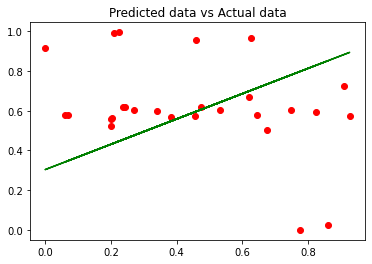

In [20]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='red')
plt.title("Predicted data vs Actual data")

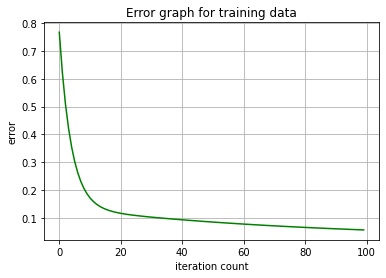

In [21]:
iters=np.arange(epochs)
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

**Testing data :**

In [22]:
tx=np.array(test_data['X'])
ty=np.array(test_data['Y'])
test_data_pred=m*test_data['X']+c
print(test_data_pred)

24    0.940272
9     0.615486
3     0.880819
Name: X, dtype: float64


In [23]:
yp1=[]
for i in range(len(tx)):
  p1=(m*tx[i])+c
  yp1.append(p1)
print("Predicted values (yp) : ",yp1)

Predicted values (yp) :  [0.9402716734387274, 0.6154861419821542, 0.8808194066636258]


In [30]:
sum=0
s2=0
for i in range(len(tx)):
  sum+=(ty[i]-yp1[i])**2
  s2+=ty[i]-yp1[i]
mse1=sum/len(tx)
mae1=s2/len(tx)
print("Mean Square Error for testing data (MSE) : ",mse1)
print("Root mea square error for testing data (RMSE) : ",mse1**0.5)
print("Mean Absolute Error for testing data (MAE) : ",mae1)

Mean Square Error for testing data (MSE) :  0.042402331213483115
Root mea square error for testing data (RMSE) :  0.20591826342867967
Mean Absolute Error for testing data (MAE) :  -0.08231069318659456


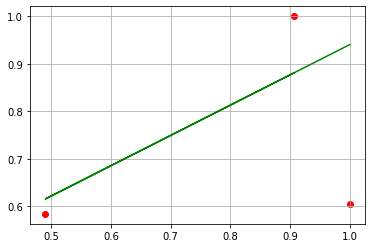

In [27]:
plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['X'],test_data_pred,'green')
plt.grid()

In [28]:
x_min=data['X'].min()
x_max=data['X'].max()
y_min=data['Y'].min()
y_max=data['Y'].max()

**Predict Output**

In [29]:
x2=float(input("Enter pressure of liquid nitrogen value : "))
xi=(x2-x_min)/(x_max-x_min)
yi=m*xi+c
yi=yi*(y_max-y_min)+y_min
print("Weight of liquid nitrogen based on its pressure {} is : {}".format(x2,yi))

Enter pressure of liquid nitrogen value : 88.7
Weight of liquid nitrogen based on its pressure 88.7 is : 509.095452920519
